In [45]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.linear_model import LinearRegression
import pmdarima as pm
#from pmdarima.model_selection import train_test_split
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

In [46]:
#Loading the dataset
df = pd.read_csv('C:\\Users\\binur\\Desktop\\IT4021_IoTBDA_Assignment\\colombo_rh_2012-2018.csv')

In [47]:
df.head(10)

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0
5,43466,COLOMBO,RHMAX,2012,1,6,93.0
6,43466,COLOMBO,RHMAX,2012,1,7,96.0
7,43466,COLOMBO,RHMAX,2012,1,8,96.0
8,43466,COLOMBO,RHMAX,2012,1,9,98.0
9,43466,COLOMBO,RHMAX,2012,1,10,93.0


In [48]:
#Removing unused columns
df.drop(['station_id','station_name'],axis=1,inplace=True)
df

,element_name,year,month,day,obs_val
0,RHMAX,2012,1,1,91.0
1,RHMAX,2012,1,2,90.0
2,RHMAX,2012,1,3,89.0
3,RHMAX,2012,1,4,89.0
4,RHMAX,2012,1,5,95.0
...,...,...,...,...,...
4398,RHMAX,2018,12,27,90.0
4399,RHMAX,2018,12,28,88.0
4400,RHMAX,2018,12,29,76.0
4401,RHMAX,2018,12,30,81.0


In [49]:
#Exploring the dataset
df.isnull().sum()

element_name     0
year             0
month            0
day              0
obs_val         20
dtype: int64

* There are 20 null values in the obs_val column.

In [50]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

     element_name  year  month  day  obs_val
60          RHMAX  2012      2   30      NaN
61          RHMAX  2012      2   31      NaN
123         RHMAX  2012      4   31      NaN
185         RHMAX  2012      6   31      NaN
278         RHMAX  2012      9   31      NaN
340         RHMAX  2012     11   31      NaN
431         RHMAX  2013      2   29      NaN
432         RHMAX  2013      2   30      NaN
433         RHMAX  2013      2   31      NaN
495         RHMAX  2013      4   31      NaN
557         RHMAX  2013      6   31      NaN
650         RHMAX  2013      9   31      NaN
712         RHMAX  2013     11   31      NaN
803         RHMAX  2014      2   29      NaN
804         RHMAX  2014      2   30      NaN
805         RHMAX  2014      2   31      NaN
867         RHMAX  2014      4   31      NaN
929         RHMAX  2014      6   31      NaN
1022        RHMAX  2014      9   31      NaN
1084        RHMAX  2014     11   31      NaN


* As we can see here the obs_val column has NaN values for rows that has an invalid day for a given month like Februray 30 so dropping those columns will be the best thing to do since they have no meaning in them.

In [51]:
#Dropping rows with NULL values
df.dropna(axis=0,inplace=True)
print(df)

     element_name  year  month  day  obs_val
0           RHMAX  2012      1    1     91.0
1           RHMAX  2012      1    2     90.0
2           RHMAX  2012      1    3     89.0
3           RHMAX  2012      1    4     89.0
4           RHMAX  2012      1    5     95.0
...           ...   ...    ...  ...      ...
4398        RHMAX  2018     12   27     90.0
4399        RHMAX  2018     12   28     88.0
4400        RHMAX  2018     12   29     76.0
4401        RHMAX  2018     12   30     81.0
4402        RHMAX  2018     12   31     82.0

[4383 rows x 5 columns]


In [52]:
df.isnull().sum()

element_name    0
year            0
month           0
day             0
obs_val         0
dtype: int64

In [53]:
# Combining the year, month, and day columns into a single date column
df['date'] = pd.to_datetime(df[['year','month','day']])
df.head()

,element_name,year,month,day,obs_val,date
0,RHMAX,2012,1,1,91.0,2012-01-01
1,RHMAX,2012,1,2,90.0,2012-01-02
2,RHMAX,2012,1,3,89.0,2012-01-03
3,RHMAX,2012,1,4,89.0,2012-01-04
4,RHMAX,2012,1,5,95.0,2012-01-05


In [54]:
#Checking for duplicate rows
df.duplicated().sum()

365

In [55]:
#Dropping the duplicate values
df.drop_duplicates(inplace=True,keep='first')

In [56]:
df.duplicated().sum()

0

In [57]:
df

,element_name,year,month,day,obs_val,date
0,RHMAX,2012,1,1,91.0,2012-01-01
1,RHMAX,2012,1,2,90.0,2012-01-02
2,RHMAX,2012,1,3,89.0,2012-01-03
3,RHMAX,2012,1,4,89.0,2012-01-04
4,RHMAX,2012,1,5,95.0,2012-01-05
...,...,...,...,...,...,...
4033,RHMIN,2018,12,27,76.0,2018-12-27
4034,RHMIN,2018,12,28,73.0,2018-12-28
4035,RHMIN,2018,12,29,68.0,2018-12-29
4036,RHMIN,2018,12,30,55.0,2018-12-30


In [58]:
#Dropping the year, month, and day columns.
df.drop(['year','month','day'],axis=1,inplace=True)
df

,element_name,obs_val,date
0,RHMAX,91.0,2012-01-01
1,RHMAX,90.0,2012-01-02
2,RHMAX,89.0,2012-01-03
3,RHMAX,89.0,2012-01-04
4,RHMAX,95.0,2012-01-05
...,...,...,...
4033,RHMIN,76.0,2018-12-27
4034,RHMIN,73.0,2018-12-28
4035,RHMIN,68.0,2018-12-29
4036,RHMIN,55.0,2018-12-30


In [59]:
df[df['date'] == '2015-04-01']

,element_name,obs_val,date
1206,RHMAX,95.0,2015-04-01
1571,RHMIN,78.0,2015-04-01


* For the same date there are 2 date values RHMAX andRHMIN so we would remove the RHMIN.

In [61]:
#Dropping the RHMIN columns
df = df.drop(df[df['element_name'] == 'RHMIN'].index)
df

,element_name,obs_val,date
0,RHMAX,91.0,2012-01-01
1,RHMAX,90.0,2012-01-02
2,RHMAX,89.0,2012-01-03
3,RHMAX,89.0,2012-01-04
4,RHMAX,95.0,2012-01-05
...,...,...,...
2937,RHMAX,90.0,2018-12-27
2938,RHMAX,88.0,2018-12-28
2939,RHMAX,76.0,2018-12-29
2940,RHMAX,81.0,2018-12-30


In [62]:
df[df['date'] == '2015-04-01']

,element_name,obs_val,date
1206,RHMAX,95.0,2015-04-01


In [63]:
df = df.set_index('date')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2012-01-01 to 2018-12-31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   element_name  2557 non-null   object 
 1   obs_val       2557 non-null   float64
dtypes: float64(1), object(1)
memory usage: 59.9+ KB


In [65]:
x = df.drop(['obs_val'], axis=1)
x.head()

,element_name
date,
2012-01-01,RHMAX
2012-01-02,RHMAX
2012-01-03,RHMAX
2012-01-04,RHMAX
2012-01-05,RHMAX


In [66]:
y = df['obs_val']
print(y)

date
2012-01-01    91.0
2012-01-02    90.0
2012-01-03    89.0
2012-01-04    89.0
2012-01-05    95.0
              ... 
2018-12-27    90.0
2018-12-28    88.0
2018-12-29    76.0
2018-12-30    81.0
2018-12-31    82.0
Name: obs_val, Length: 2557, dtype: float64


# Checking for data stationarity

In [67]:
#Checking for stationarity using the ADF test
result = adfuller(df['obs_val'])

In [68]:
# Print the ADF test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.951976
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


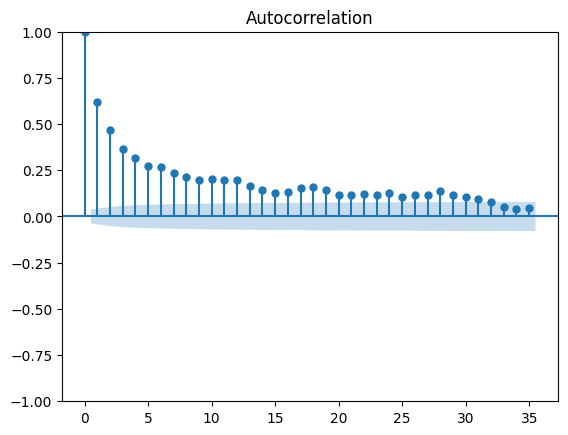

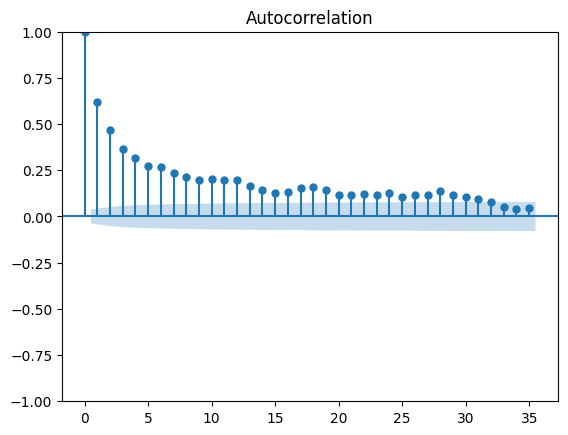

In [69]:
plot_acf(df['obs_val'])

* This graph shows that the time series is not stationary so we need to difference it once.

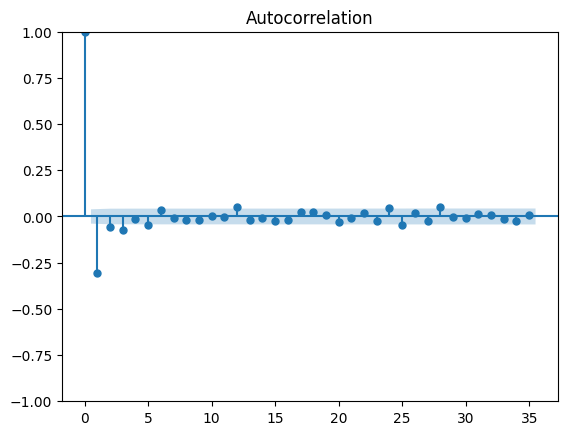

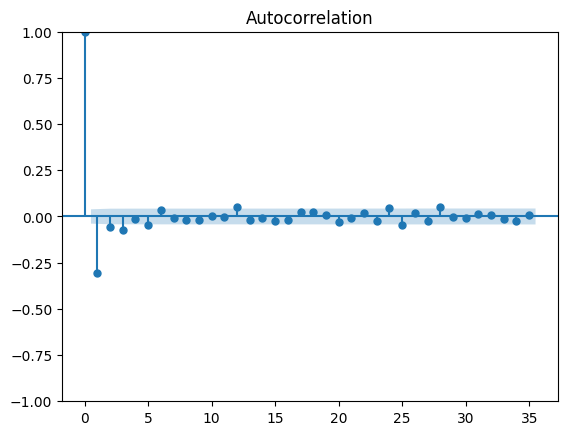

In [70]:
plot_acf(df['obs_val'].diff().dropna())

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


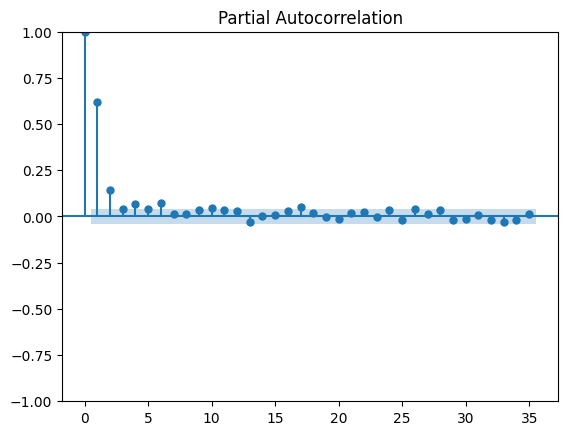

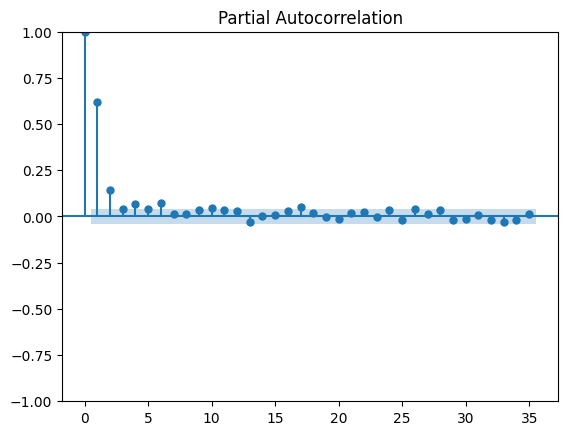

In [71]:
plot_pacf(df['obs_val'])

# Checking for seasonality in data

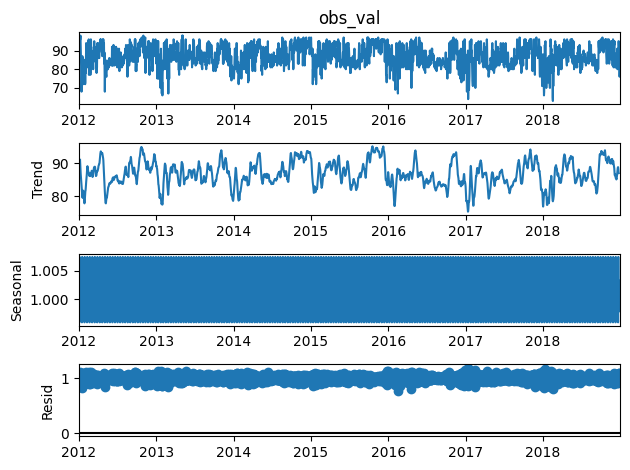

In [72]:
# Perform seasonal decomposition using moving averages
decomposition = seasonal_decompose(df['obs_val'], model='multiplicative', period=12)

# Plot the seasonal decomposition
fig = decomposition.plot()

* The seasonal component in the seasonal graph is flat so there is no seasonal component.

# Checking for normality of the residuals

In [73]:
#Finding the optimum values for p,d, and q
opt_vals = pm.auto_arima(df['obs_val'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14873.008, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16163.865, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14928.154, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15376.137, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30098.217, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14865.026, Time=2.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=15094.561, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14870.516, Time=1.41 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=14853.449, Time=2.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=15002.144, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=14858.688, Time=1.59 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=14847.599, Time=2.74 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=14948.370, Time=0.94 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=14851.410, Time=3.35 sec
 ARIMA(1,0,5)(0,0,0

* The optimum values for p=1, d=0, and q=4.

In [74]:
#Splitting the dataset into training and testing
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [75]:
#Fitting the ARIMA model
model = ARIMA(df['obs_val'], order=(8,0,30)) #obtained from the graph
model_fit = model.fit()

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                obs_val   No. Observations:                 2557
Model:                ARIMA(8, 0, 30)   Log Likelihood               -7392.743
Date:                Fri, 05 May 2023   AIC                          14865.485
Time:                        10:45:00   BIC                          15099.349
Sample:                    01-01-2012   HQIC                         14950.291
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.8355      0.472    183.871      0.000      85.910      87.761
ar.L1          0.5233      4.159      0.126      0.900      -7.627       8.674
ar.L2          0.3699      3.934      0.094      0.9

In [77]:
#obtaining residuals
residuals = model_fit.resid
print(residuals)

date
2012-01-01     4.164516
2012-01-02     0.587176
2012-01-03    -0.098816
2012-01-04     0.481763
2012-01-05     6.500870
                ...    
2018-12-27    -0.504660
2018-12-28    -1.456292
2018-12-29   -12.371039
2018-12-30    -0.644752
2018-12-31    -1.466285
Length: 2557, dtype: float64


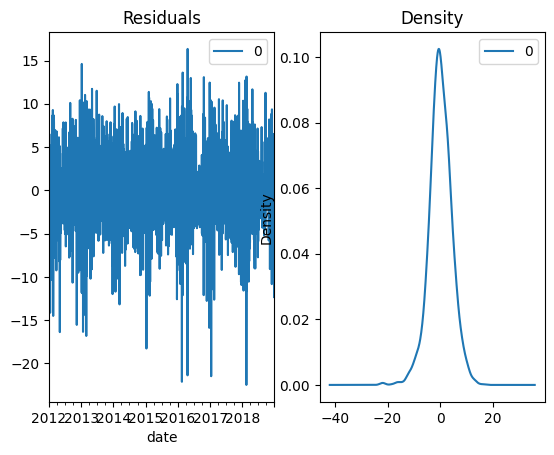

In [78]:
#Checking whether the residuals are normally distributed
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

* The residuals are normally distributed.

In [79]:
#Making predictions
#n = 30
#forecast = model_fit.predict(start=len(train), end=len(train)+804-1)
#forecast

In [80]:
#Making predictions for the next 6 years
#n=365
start_date = '2019-01-01'
end_date = '2025-01-01'
date_range = pd.date_range(start=start_date, end=end_date)
future_preds = model_fit.forecast(steps=len(date_range))
future_preds.index = date_range

In [81]:
future_preds

2019-01-01    83.379585
2019-01-02    84.584591
2019-01-03    85.097468
2019-01-04    85.277394
2019-01-05    85.749084
                ...    
2024-12-28    86.835484
2024-12-29    86.835484
2024-12-30    86.835484
2024-12-31    86.835484
2025-01-01    86.835484
Freq: D, Name: predicted_mean, Length: 2193, dtype: float64

In [82]:
#Storing the future predicted data in a dataframe
data = pd.DataFrame(future_preds).reset_index()
data

,index,predicted_mean
0,2019-01-01,83.379585
1,2019-01-02,84.584591
2,2019-01-03,85.097468
3,2019-01-04,85.277394
4,2019-01-05,85.749084
...,...,...
2188,2024-12-28,86.835484
2189,2024-12-29,86.835484
2190,2024-12-30,86.835484
2191,2024-12-31,86.835484


In [83]:
#Extracting the past data for 12 months from 2022-05-05 to 2023-05-05
data_past = data[(data['index'] >= '2022-05-05') & (data['index'] <= '2023-05-05')]
data_past

,index,predicted_mean
1220,2022-05-05,86.835484
1221,2022-05-06,86.835484
1222,2022-05-07,86.835484
1223,2022-05-08,86.835484
1224,2022-05-09,86.835484
...,...,...
1581,2023-05-01,86.835484
1582,2023-05-02,86.835484
1583,2023-05-03,86.835484
1584,2023-05-04,86.835484


In [84]:
#Exporting the past data for 12 months from 2022-05-05 to 2023-05-05
data_past.to_csv('Past_data.csv',index=False)

In [85]:
#Extracting the future data for 12 months from 2023-05-05 to 2024-05-05
data_future = data[(data['index'] >= '2023-05-05') & (data['index'] <= '2024-05-05')]
data_future

,index,predicted_mean
1585,2023-05-05,86.835484
1586,2023-05-06,86.835484
1587,2023-05-07,86.835484
1588,2023-05-08,86.835484
1589,2023-05-09,86.835484
...,...,...
1947,2024-05-01,86.835484
1948,2024-05-02,86.835484
1949,2024-05-03,86.835484
1950,2024-05-04,86.835484


In [86]:
#Exporting the dataframe to a csv file
data_future.to_csv('Future_data.csv',index=False)

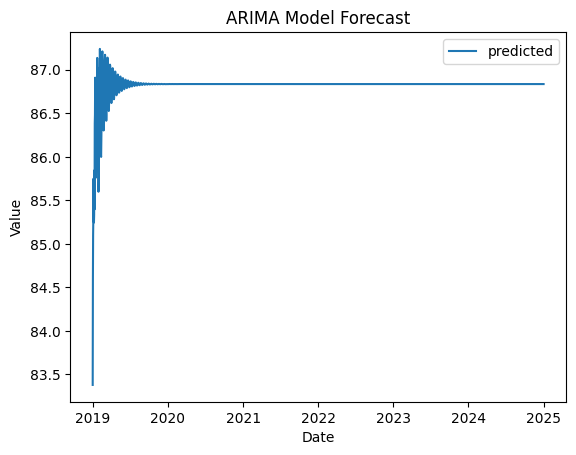

In [87]:
#Plotting the data for next 12 months
#plt.plot(test.index, test['obs_val'],label='actual') #Actual values
plt.plot(future_preds.index, future_preds.values, label='predicted') #Predicted values
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()